In [2]:
cd ..

/Users/supawat/Code/radio-gyms


In [4]:
MAP_SCENE = "./assets/models/poznan.obj"

## Import libraries

In [5]:
from radio_gyms.engines import Tracer

In [84]:
from radio_gyms.utils import Plotter, VecDistance

In [77]:
from radio_gyms.models import TheoreticalOutdoorModel

In [82]:
import matplotlib.pyplot as plt

In [114]:
import numpy as np

## Initialize modules

In [107]:
terrain_map = tracer.get_terrain_depth(100, 100)

In [108]:
tracer = Tracer(MAP_SCENE, ref_max=1)

In [109]:
plotter = Plotter(tracer.min_bound, tracer.max_bound, terrain_map)

In [110]:
tx = [70, 5, 70]

In [111]:
plotter.tx_pos = [tx]

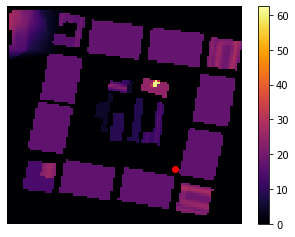

In [112]:
plotter.render_top()

## Propagation Comparision on different Frequency

In [121]:
rxs = []
for i in range(120):
    rx = [70, 1.2, 70-i]
    rx = np.array(rx)
    rxs.append(rx)

In [158]:
frequency_range = [2.4e9, 5.1e9, 28e9]

In [161]:
prop_results = []
for freq in frequency_range:
    prop_res = {
        'freq': freq,
        'max_rec_list': [],
        'distance_list': []
    }
    maximum_rev_power = []
    distances = []
    
    for rx in rxs:
        result = tracer.trace_outdoor(tx,rx)
        model = TheoreticalOutdoorModel(result, tx_power_dbm=15)
        
        rev_power = model.calculate_max_received_power(frequency=freq)
        maximum_rev_power.append(rev_power)

        distance = VecDistance(tx, rx)
        distances.append(distance)
        
    prop_res['max_rec_list'] = maximum_rev_power
    prop_res['distance_list'] = distances
    prop_results.append(prop_res)

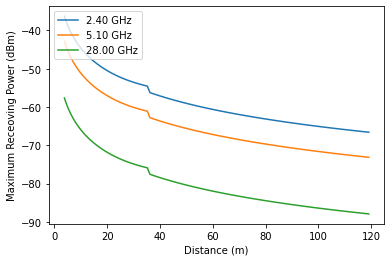

In [162]:
for result in prop_results:
    freq = result['freq']
    plt.plot(result['distance_list'], result['max_rec_list'], label=f'{(freq/1e9):.2f} GHz')
plt.xlabel('Distance (m)')
plt.ylabel("Maximum Receoving Power (dBm)")
plt.legend(loc="upper left")
plt.show()

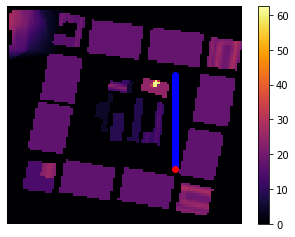

In [97]:
plotter.render_top()